# Usa Housing Price Prediction Dataset

# Import Modules

In [1]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.impute import KNNImputer,SimpleImputer
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score


from statsmodels import api as sm
from scipy.stats import kstest
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import pickle,json
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

# Data Gathering

In [2]:
df=pd.read_csv('USA_Housing.csv')
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

# EDA

In [3]:
df.info()   # no object datatype in ouer set except Address 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()   # look some stats info about data

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

## Droping Unimportant Feature

In [5]:
df.drop(columns='Address',inplace=True)

In [6]:
df.rename(columns={'Avg. Area Income':'Avg_AreaIncome','Avg. Area House Age':'Avg_AreaHouseAge','Avg. Area Number of Rooms':'Avg_AreaNumberofRooms','Avg. Area Number of Bedrooms':'Avg_AreaNumberofBedrooms'},inplace=True)

## Histogram of all feature

In [7]:
# all data is almost normally distributed 

array([[<AxesSubplot:title={'center':'Avg_AreaIncome'}>,
        <AxesSubplot:title={'center':'Avg_AreaHouseAge'}>],
       [<AxesSubplot:title={'center':'Avg_AreaNumberofRooms'}>,
        <AxesSubplot:title={'center':'Avg_AreaNumberofBedrooms'}>],
       [<AxesSubplot:title={'center':'Area Population'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

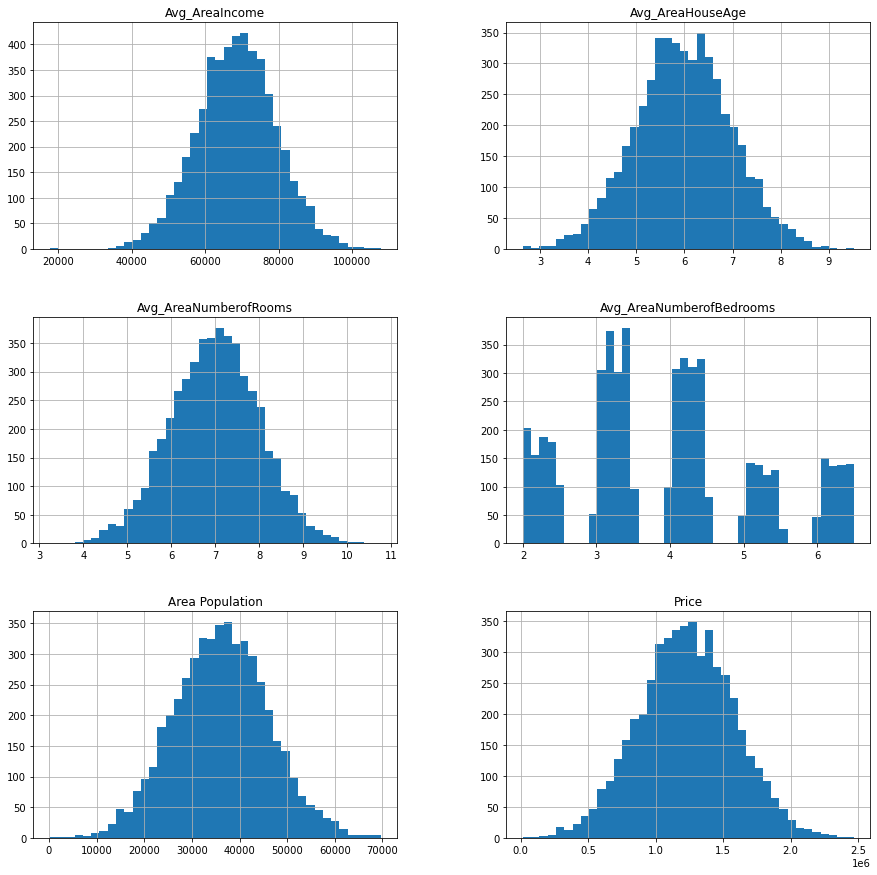

In [8]:
df.hist(bins=40,grid=True,figsize=(15,15))

## Outlier

<AxesSubplot:>

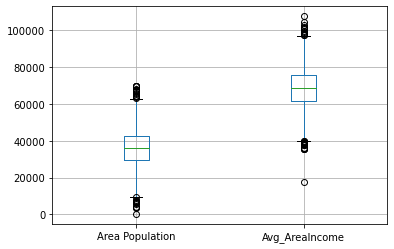

In [9]:
df[['Area Population','Avg_AreaIncome']].boxplot()    #sns.boxplot(df)

<AxesSubplot:>

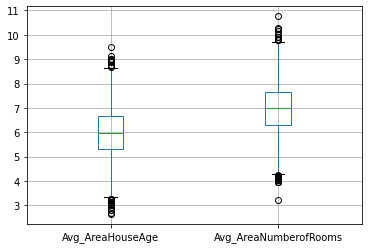

In [10]:
df[['Avg_AreaHouseAge','Avg_AreaNumberofRooms']].boxplot()

In [11]:
# most of these outlier are may be real value except that the area population is zero 

## Outlier tratment

In [12]:

q1=df['Area Population'].describe()[4]      #df['fn'].quintile(0.25)
q3=df['Area Population'].describe()[6]      
iqr=q3-q1

lower_tail=q1-1.5*iqr     # upper tail q3+1.5(iqr)      
print()
print('q1==',q1)
print('q3==',q3)
print()
print('iqr==',iqr)
print()
print('lower_tail==',lower_tail)


q1== 29403.928701608518
q3== 42861.290768915605

iqr== 13457.362067307087

lower_tail== 9217.885600647885


In [13]:
df.loc[df['Area Population']<lower_tail,'Area Population']=np.nan # imputing outlier with nan
#df['Area population'].loc[df['Area population']<lower_tail]=np.nan

In [14]:
knn=KNNImputer()          # predict nan value based on k_neghbour    4.1,4.2,4.1
a=knn.fit_transform(df)  
df1=pd.DataFrame(a,columns=df.columns)    #50% missing    mean median mode same value
# df1  s# simple imputer    #strategy

In [15]:
np.where(df['Area Population']<lower_tail)  # so succesfully imputed with outlier 

(array([], dtype=int64),)

## Linearity

### i) heatmap

In [16]:
x=df1.corr().iloc[5:,1:5]   # tail(1)

<AxesSubplot:>

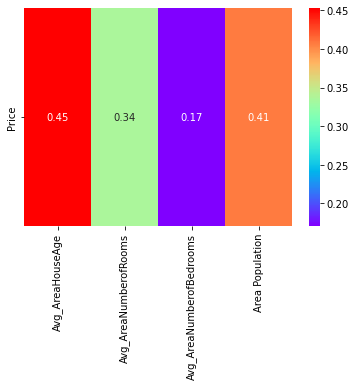

In [17]:
sns.heatmap(x,annot=True,cmap='rainbow')

In [18]:
# Avg area of Number of bedrooms showing less corr with dependent feature

### ii)Detailed  Info about Data

In [19]:
report=ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ViF    # no multicollinearity

[38.27706970865848, 29.122826146498756, 45.3783267373598, 14.544311443298627, 14.6401943794529, 27.91821797145524]



<AxesSubplot:>

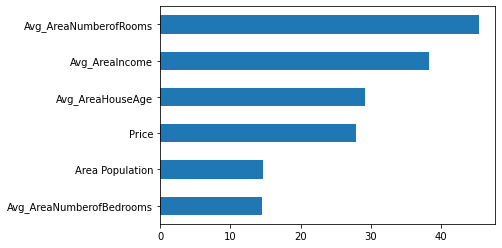

In [20]:
vif=[]
for i in range(df1.shape[1]):  # feature
    v=variance_inflation_factor(df1.to_numpy(),i)
    vif.append(v)
print(vif)
print()


ser=pd.Series(vif,index=df1.columns)
ser.sort_values().plot(kind="barh")

In [21]:
## most of the feature are high corr it will not affect accuracy but affect infernce.

## Train test split

In [22]:
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=34,shuffle=False)


## Model Trainning

In [23]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

## Test Evalution of Linear reg Model

In [24]:
y_pred=lin_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 10632685715.802977
******************************************************************************
mean_absolute_error== 70007.13577296794
******************************************************************************
root_mean_squared_error== 103114.91509865572
******************************************************************************
r2_score== 0.9127885321256416
******************************************************************************


## Training Evalution of Linear reg Model

In [25]:
y_predict=lin_reg.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 10641787132.366558
******************************************************************************
mean_absolute_error== 69687.94718606252
******************************************************************************
root_mean_squared_error== 103159.03805467827
******************************************************************************
r2_score== 0.915347323936013
******************************************************************************


In [26]:
# model perform very well by linear regression

In [27]:
result={'r2_train':[],"r2_test":[]}
index=[]

In [28]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Linear regression model')

## Normality

In [29]:
residual1=y_pred-y_test
residual2=y_predict-y_train
print('test residual',residual1)
print('train residual',residual2)

test residual 3550     38233.125464
3551     38399.757672
3552      9784.766945
3553     -3999.056141
3554    168136.301267
            ...      
4995      -819.508464
4996    -75817.454670
4997    -10632.545179
4998     64889.188701
4999      2396.386889
Name: Price, Length: 1450, dtype: float64
train residual 0       166956.789048
1        -9348.857237
2       193264.061511
3      -140041.715965
4       214338.980510
            ...      
3545     -5411.819774
3546    -93340.351871
3547     47513.291319
3548     41972.928382
3549    -90955.475205
Name: Price, Length: 3550, dtype: float64


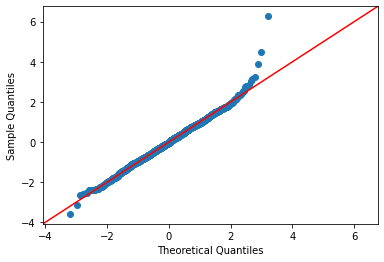

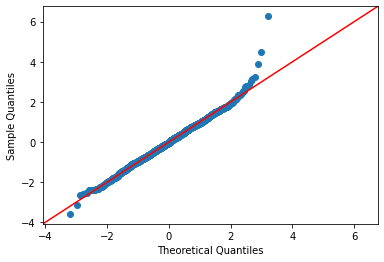

In [30]:
sm.qqplot(data=residual1,line="45",fit=True)   # residual is not deviated that much so its normally dist 

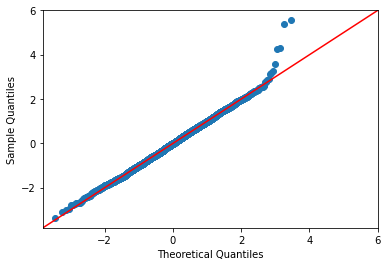

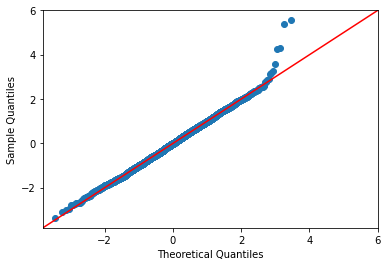

In [31]:
sm.qqplot(data=residual2,line="45",fit=True) #error is normallay distribute model perform very well till now

## Disptlot

<AxesSubplot:ylabel='Density'>

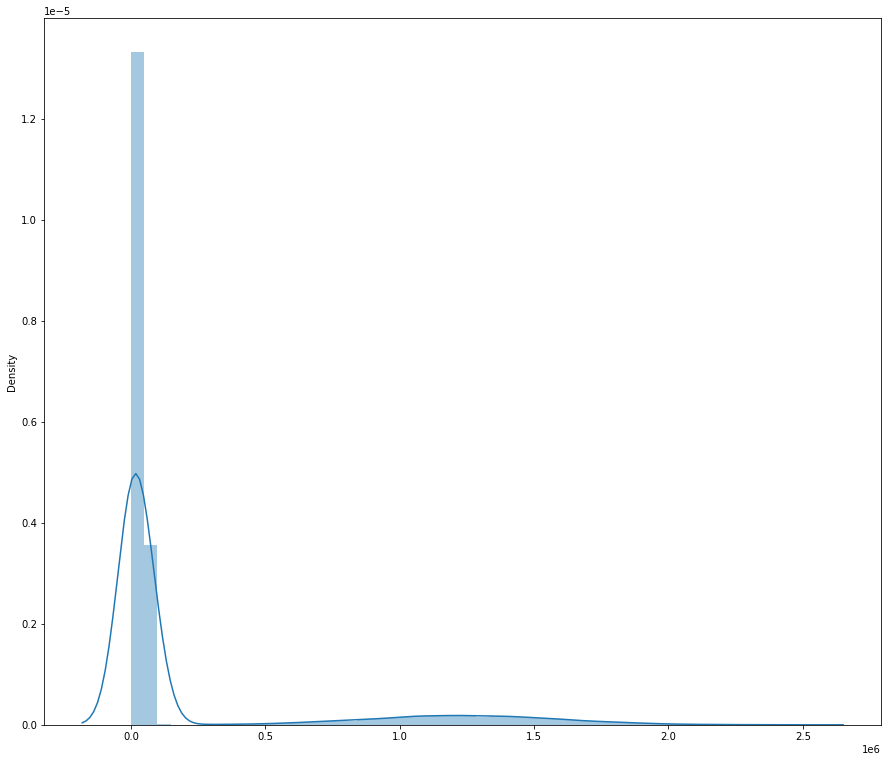

In [32]:
plt.figure(figsize=(15,13))
sns.distplot(df1)

In [33]:
# tail is not that much skewed so 3 assumption perform well till now

## Homoscadesticity

<AxesSubplot:xlabel='Price', ylabel='Price'>

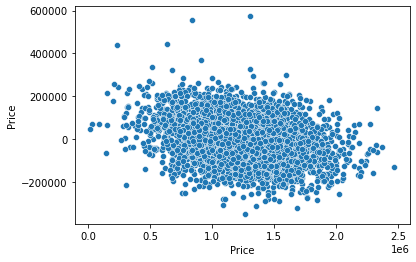

In [34]:
sns.scatterplot(x=y_train,y=residual2)  # constant variance

<AxesSubplot:xlabel='Price', ylabel='Price'>

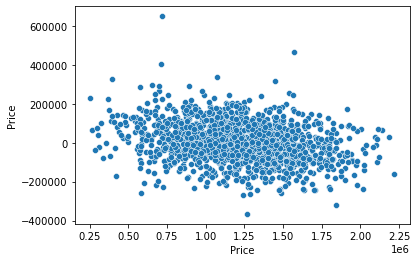

In [35]:
sns.scatterplot(x=y_test,y=residual1)

In [36]:
# homoscadesticity also perform good except some point, other point will have constant variance

   # Ridge Regression model With hypertunning

In [37]:
rid_model=Ridge()     # avoid overfitting 

hyperparameter={'alpha':np.arange(0,2,0.01),
               'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
rand_model=RandomizedSearchCV(rid_model,hyperparameter,cv=5)
rand_model.fit(x_train,y_train)
x=rand_model.best_estimator_
x

Ridge(alpha=1.81, solver='svd')

## Ridge Model training

In [38]:
ridge_model=x
ridge_model.fit(x_train,y_train)

Ridge(alpha=1.81, solver='svd')

## Testing Evalution Of Ridge Model

In [39]:
y_pred=ridge_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 10632491229.776094
******************************************************************************
mean_absolute_error== 69983.23890313576
******************************************************************************
root_mean_squared_error== 103113.97203956453
******************************************************************************
r2_score== 0.9127901273399025
******************************************************************************


## Training Evalution of Ridge Model

In [40]:
y_predict=ridge_model.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 10641799356.754408
******************************************************************************
mean_absolute_error== 69686.01868477615
******************************************************************************
root_mean_squared_error== 103159.09730486404
******************************************************************************
r2_score== 0.9153472266941558
******************************************************************************


In [41]:
# exact same accuracy for ridge with hypertunning and linear model

In [42]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Ridge regression with hypertunning(rscv)')

## Coef vs independent vr graph

<AxesSubplot:>

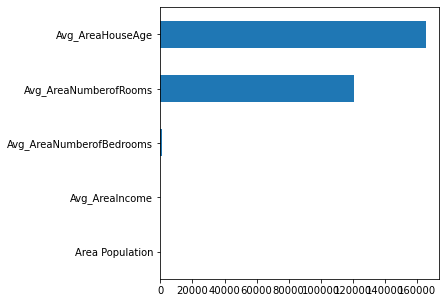

In [43]:
Ser=pd.Series(ridge_model.coef_,index=x_train.columns)
plt.figure(figsize=(5,5))
Ser.sort_values().plot(kind='barh')

In [44]:
# ridge regression will make unimportant feature near to zero

## Lasso  Regression With Hypertunning

In [45]:
lasso_model=Lasso()
hyperparameter={'alpha':np.arange(0,2,0.01),
               'selection' : ['cyclic', 'random']}
rand_model_lasso=RandomizedSearchCV(lasso_model,hyperparameter,cv=5)
rand_model_lasso.fit(x_train,y_train)
x=rand_model_lasso.best_estimator_
x

Lasso(alpha=1.99)

##  Lasso Model Training

In [46]:
lasso_model=x.fit(x_train,y_train)

## Lasso model Testing Evalution

In [47]:
y_pred=lasso_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 10632686476.775133
******************************************************************************
mean_absolute_error== 70006.97410247102
******************************************************************************
root_mean_squared_error== 103114.91878857846
******************************************************************************
r2_score== 0.912788525883992
******************************************************************************


## lasso model with hypertunning Training evalution

In [48]:
y_predict=lasso_model.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 10641787140.848999
******************************************************************************
mean_absolute_error== 69689.04640848743
******************************************************************************
root_mean_squared_error== 103159.03809579168
******************************************************************************
r2_score== 0.9153473238685373
******************************************************************************


In [49]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Lasso regression with hypertunning(rscv)')

In [50]:
# we got same accuracy even we trying Regulization 

<AxesSubplot:>

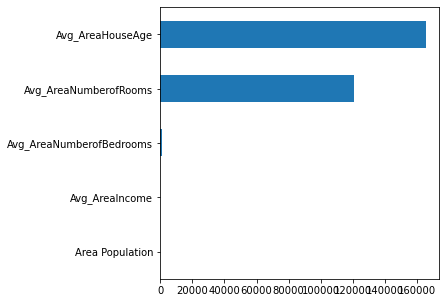

In [51]:
Ser=pd.Series(lasso_model.coef_,index=x_train.columns)
plt.figure(figsize=(5,5))
Ser.sort_values().plot(kind='barh')

In [52]:
#lasso will make umimp feature exactly zero that why it is one of the feature selection technique.

# Knn Regressor

In [53]:
#Firstly we prefer standardiation beacause earlier we have idea of about distribution. 

## i) Standardization

In [54]:
std_knn_model=StandardScaler()
a=std_knn_model.fit_transform(df1)
df2=pd.DataFrame(a,columns=df1.columns)
df2.head(3)                                   

Avg_AreaIncome  Avg_AreaHouseAge  Avg_AreaNumberofRooms  \
0        1.028660         -0.296927               0.021274   
1        1.000808          0.025902              -0.255506   
2       -0.684629         -0.112303               1.516243   

   Avg_AreaNumberofBedrooms  Area Population     Price  
0                  0.088062        -1.336992 -0.490081  
1                 -0.722301         0.402705  0.775508  
2                  0.930840         0.067630 -0.490211

In [55]:
x=df2.drop(columns='Price')
y=df2['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.head(2)

Avg_AreaIncome  Avg_AreaHouseAge  Avg_AreaNumberofRooms  \
4227       -0.191058         -0.132270              -0.139693   
4676       -1.394502          0.427867               0.795413   

      Avg_AreaNumberofBedrooms  Area Population  
4227                  0.120477        -0.851927  
4676                 -0.552125         1.163915

## Model training knn with standardization

In [56]:
knn_std_model=KNeighborsRegressor()
knn_std_model.fit(x_train,y_train)

KNeighborsRegressor()

## Testing Evalution Of Knn with standardization

In [57]:
y_pred=knn_std_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 0.13385734655327308
******************************************************************************
mean_absolute_error== 0.24573375755540283
******************************************************************************
root_mean_squared_error== 0.3658652027089664
******************************************************************************
r2_score== 0.8643641628188702
******************************************************************************


## training evalution of knn with std

In [58]:
y_predict=knn_std_model.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 0.09209561160322674
******************************************************************************
mean_absolute_error== 0.20235783426305315
******************************************************************************
root_mean_squared_error== 0.3034725878942392
******************************************************************************
r2_score== 0.9081824361749077
******************************************************************************


In [59]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('knn model with standardiztion')

## Knn std model with hypertunning

In [60]:
knn_hyp_model=KNeighborsRegressor()
tuning={'n_neighbors':np.arange(3,30),
        'weights':['uniform','distance'],
         'p':[2,1]}
knn_hyp=GridSearchCV(knn_hyp_model,tuning,cv=6)
knn_hyp.fit(x_train,y_train)
knn_hyp_std=knn_hyp.best_estimator_
knn_hyp_std

KNeighborsRegressor(n_neighbors=16, weights='distance')

## knn std with hypertunning model test evalution

In [61]:
knn_std_hyp_model=knn_hyp_std
knn_std_hyp=knn_std_hyp_model.fit(x_train,y_train)
y_pred=knn_std_hyp.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 0.12445711208664678
******************************************************************************
mean_absolute_error== 0.22912495693625703
******************************************************************************
root_mean_squared_error== 0.3527847957135437
******************************************************************************
r2_score== 0.8738892931491082
******************************************************************************


## knn std with hypertunning model training evalution

In [62]:
y_predict=knn_std_hyp.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 0.0
******************************************************************************
mean_absolute_error== 0.0
******************************************************************************
root_mean_squared_error== 0.0
******************************************************************************
r2_score== 1.0
******************************************************************************


In [63]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('knn model with std and hyp(gscv)')

Text(0.5, 1.0, 'Comparision Between Train ANd Test Accuracies')

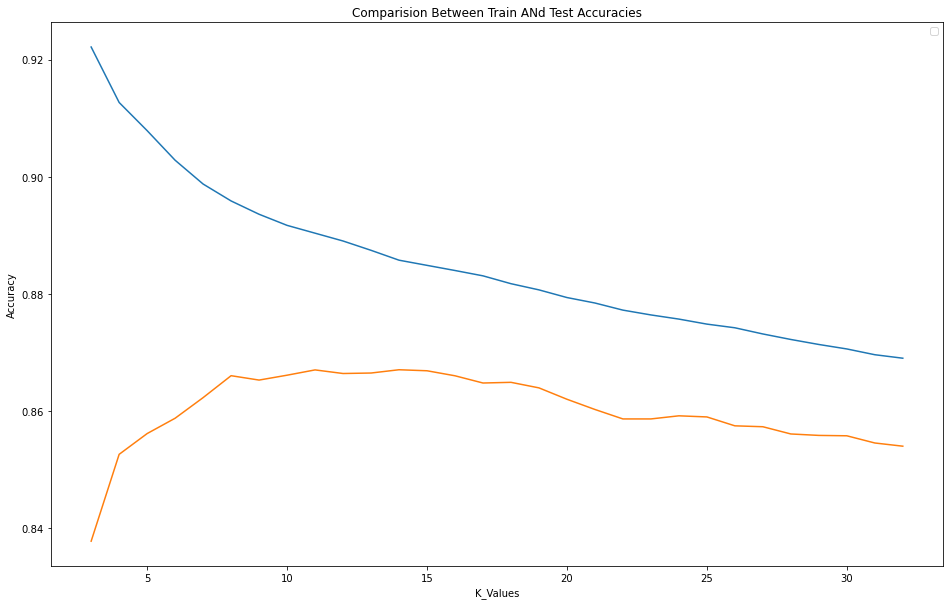

In [64]:
# comparing train and test accuracy
r2_trainn=[]
r2_testt =[]
k_values=range(3,33)
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_train=knn_reg.score(x_train,y_train)
    r2_trainn.append(r2_train)
    
    r2_test=knn_reg.score(x_test,y_test)
    r2_testt.append(r2_test)

plt.figure(figsize=(16,10))
plt.plot(k_values,r2_trainn)
plt.plot(k_values,r2_testt)
plt.legend(r2_trainn,r2_testt)
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Train ANd Test Accuracies")

In [65]:
# knn with hyp model overfits 

## ii) Normalization

In [66]:
norm=MinMaxScaler()
arr=norm.fit_transform(df1)
df3=pd.DataFrame(arr,columns=df1.columns)
df3.head()

Avg_AreaIncome  Avg_AreaHouseAge  Avg_AreaNumberofRooms  \
0        0.686822          0.441986               0.501502   
1        0.683521          0.488538               0.464501   
2        0.483737          0.468609               0.701350   
3        0.506630          0.660956               0.312430   
4        0.469223          0.348556               0.611851   

   Avg_AreaNumberofBedrooms  Area Population     Price  
0                  0.464444         0.226144  0.425210  
1                  0.242222         0.510281  0.607369  
2                  0.695556         0.455555  0.425192  
3                  0.280000         0.412785  0.507384  
4                  0.495556         0.280478  0.250702

In [67]:
x=df3.drop(columns='Price')
y=df3['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train.head(2)

Avg_AreaIncome  Avg_AreaHouseAge  Avg_AreaNumberofRooms  \
2858        0.669048          0.552379               0.525987   
1559        0.579887          0.502591               0.258186   

      Avg_AreaNumberofBedrooms  Area Population  
2858                  0.768889         0.335467  
1559                  0.062222         0.708275

## knn normalized model Training

In [68]:
norm_knn_model=KNeighborsRegressor()
norm_knn_model.fit(x_train,y_train)

KNeighborsRegressor()

## knn Normalized model Testing evalution

In [69]:
y_pred=norm_knn_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 0.0033247814330981023
******************************************************************************
mean_absolute_error== 0.038923188596787756
******************************************************************************
root_mean_squared_error== 0.057660917726811305
******************************************************************************
r2_score== 0.8453061949632635
******************************************************************************


## knn Normalized model Training evalution

In [70]:
y_predict=norm_knn_model.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 0.002064882435497416
******************************************************************************
mean_absolute_error== 0.030734119152573458
******************************************************************************
root_mean_squared_error== 0.04544097749275885
******************************************************************************
r2_score== 0.8986778769166324
******************************************************************************


In [71]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Knn model with normalization')

In [72]:
# we doesnot making model of knn norm with hyp because data is normally distributed 
# thats why standardization perform better than normalization 
#(you can compare std knn and norm knn) 

# Decision Tree Regressor With Hypertunning

## train test split

In [73]:
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=29)

## Model training

In [74]:
dec_reg=DecisionTreeRegressor()
random={
    'max_depth':np.arange(3,40),
    'min_samples_split':np.arange(2,40),    
    'min_samples_leaf':np.arange(2,35),
    'max_features':["auto", "sqrt", "log2"]
}
random_cv=RandomizedSearchCV(dec_reg,random,cv=7)
random_cv.fit(x_train,y_train)
dec=random_cv.best_estimator_

## Testing evalution of decision tree hypertuned model

In [75]:
dec_tree_hyp=dec
dec_tree_hyp.fit(x_train,y_train)

y_pred=dec_tree_hyp.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 24212762432.521072
******************************************************************************
mean_absolute_error== 100593.9489202146
******************************************************************************
root_mean_squared_error== 155604.50646597956
******************************************************************************
r2_score== 0.7991557682880753
******************************************************************************


## training evalution of Decision tree with hypertunning

In [76]:
y_predict=dec_tree_hyp.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 15467977014.844133
******************************************************************************
mean_absolute_error== 78675.6145518854
******************************************************************************
root_mean_squared_error== 124370.32208225616
******************************************************************************
r2_score== 0.8769113895694618
******************************************************************************


In [77]:
# not that much good accuracy till now lin regression lasso and ridge perform best

## Decision tree ploting

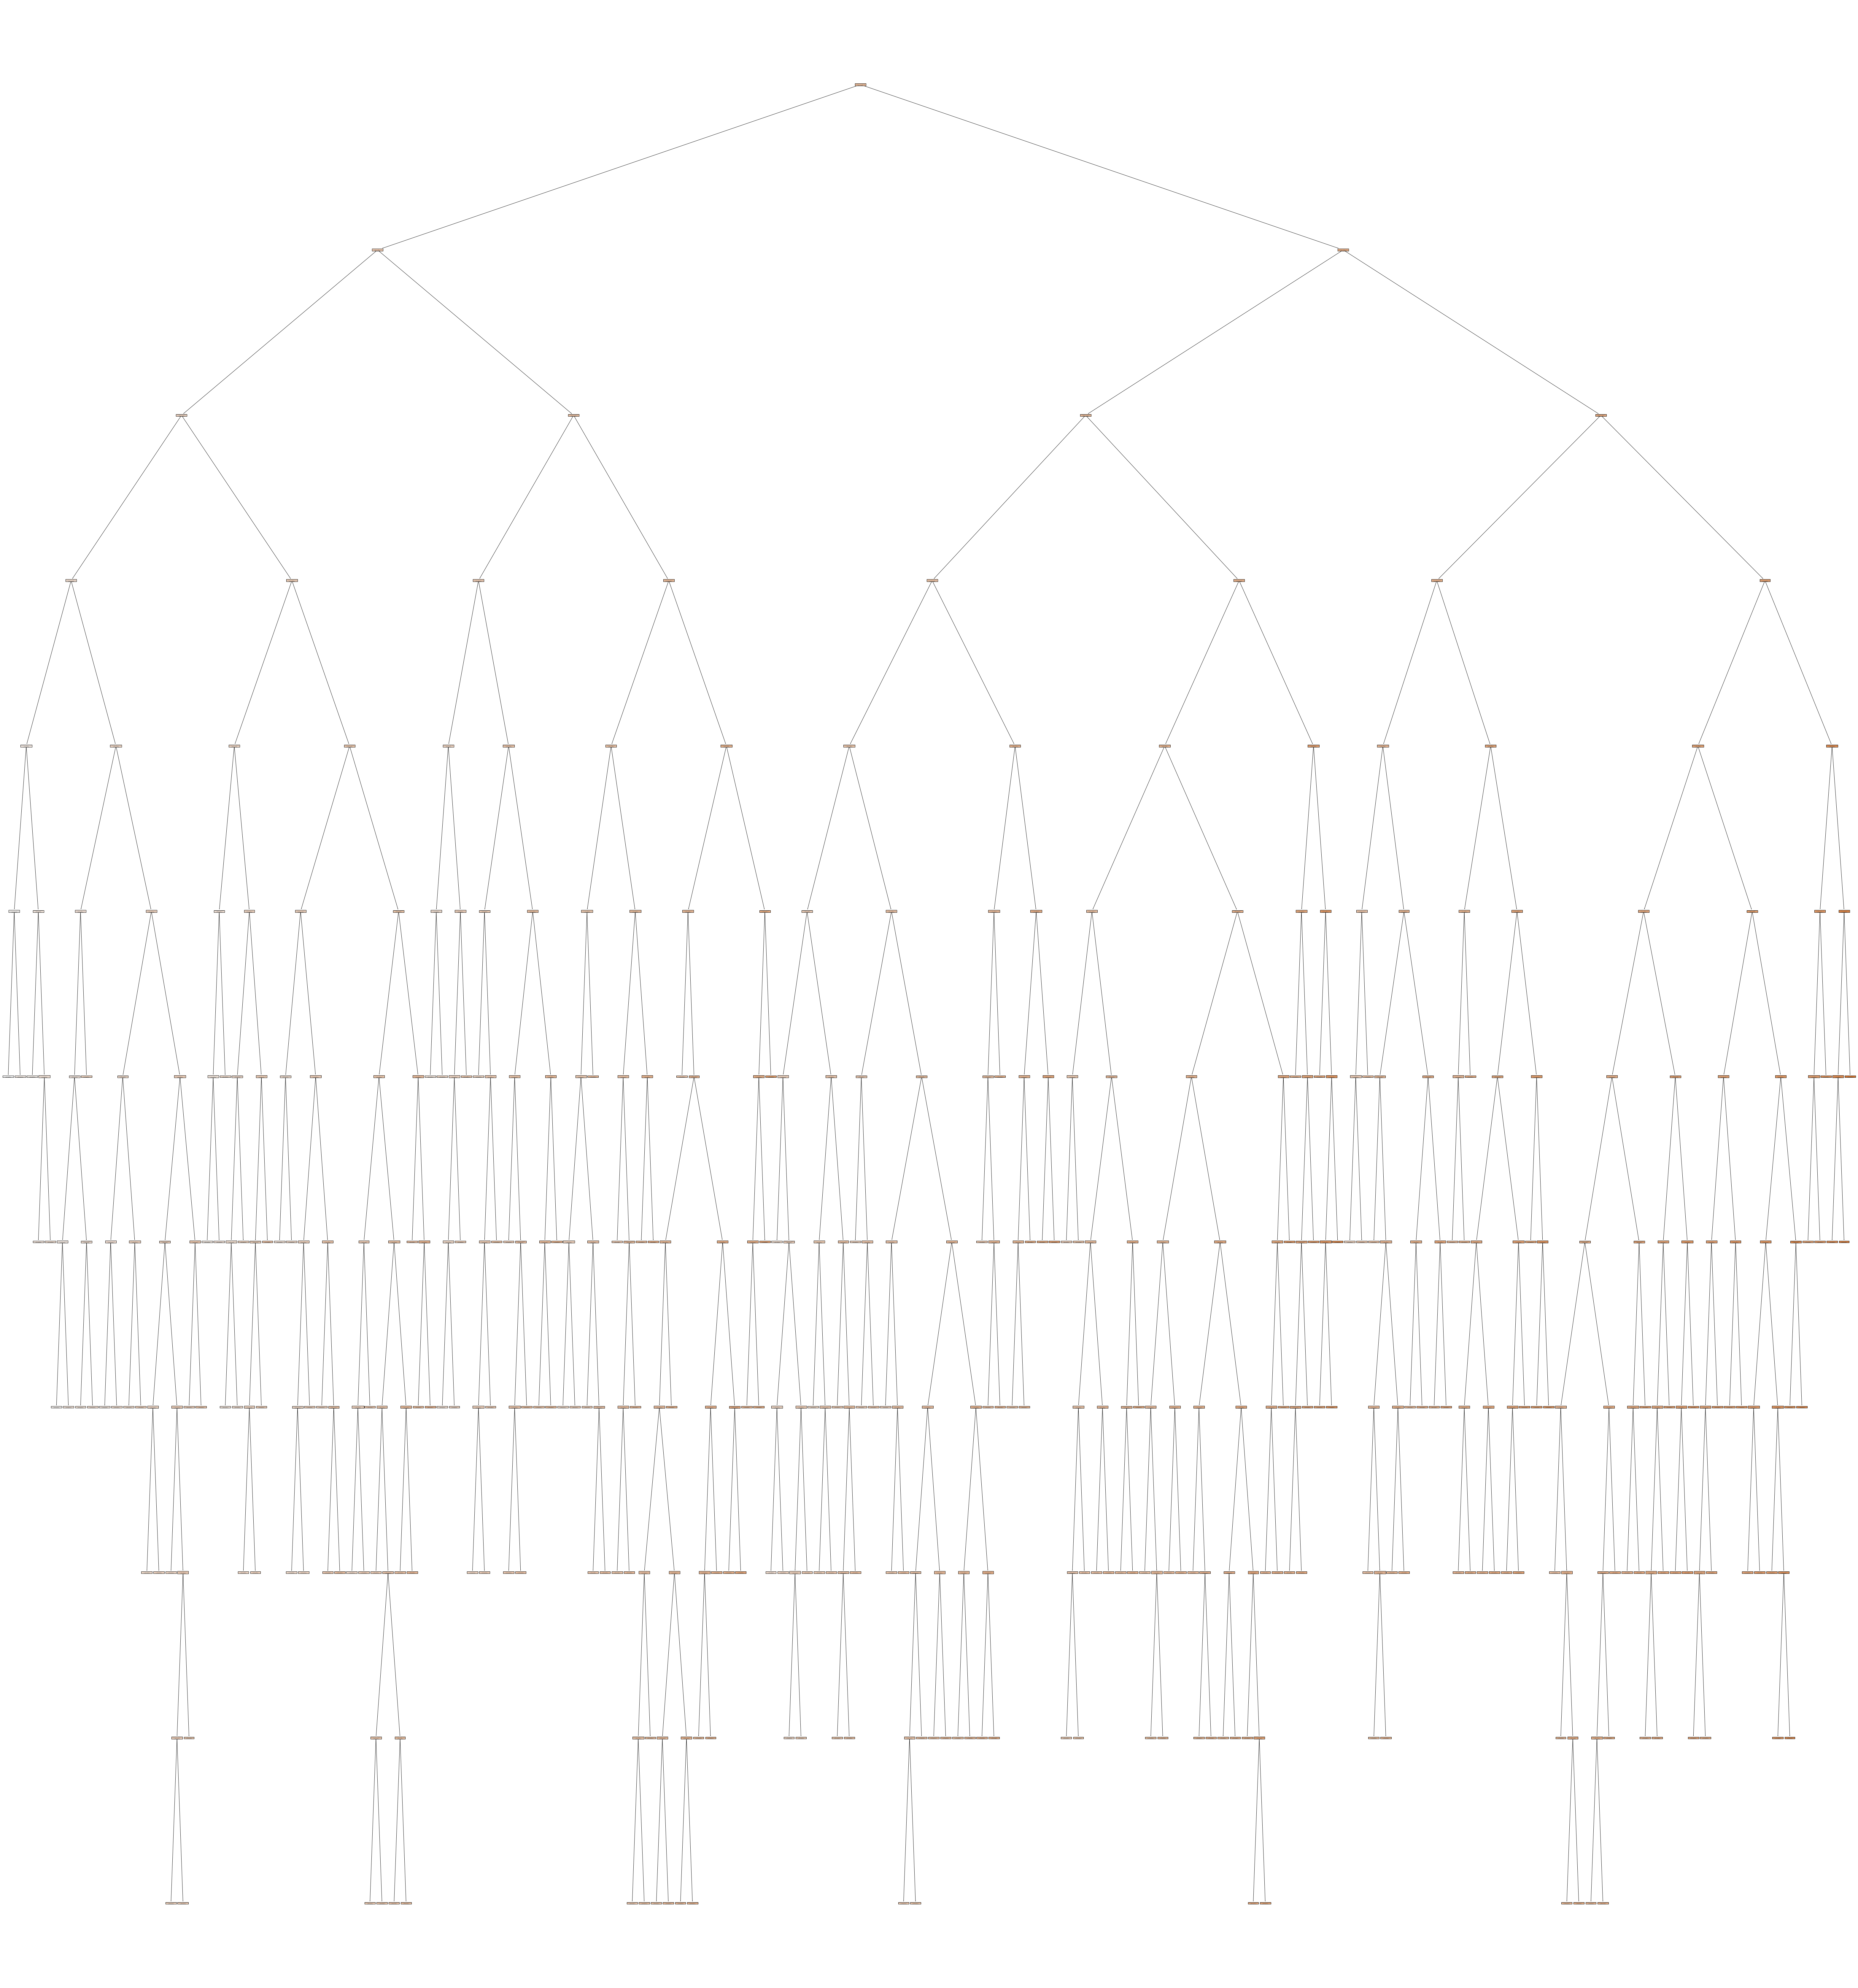

In [78]:
plt.figure(figsize=(112,123))
plot_tree(dec_tree_hyp,feature_names=x.columns,filled=True)
plt.savefig('decision tree with hyp')

In [79]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Decision tree with hyptng(rscv)')

## Feature Importance

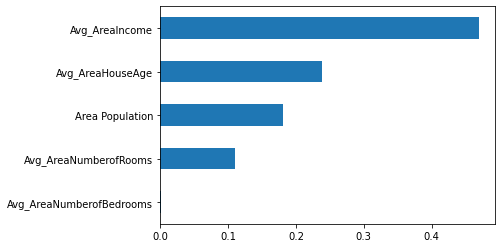

In [80]:
ser=pd.Series(dec_tree_hyp.feature_importances_,index=x.columns).sort_values().plot(kind='barh')

In [81]:
## here avg area no bedroom not giving any importance most imp feature is avg area income

# Random Forest With Hypertunning

In [82]:
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=29)

## Random Forest Model hypertunning

In [83]:
rand_reg=RandomForestRegressor()
random={'n_estimators':np.arange(5,100),
    'max_depth':np.arange(3,40),
    'min_samples_split':np.arange(2,40),
    'min_samples_leaf':np.arange(2,35),
}
random_cv=RandomizedSearchCV(rand_reg,random,cv=7)
random_cv.fit(x_train,y_train)
rand=random_cv.best_estimator_
rand

RandomForestRegressor(max_depth=39, min_samples_leaf=2, n_estimators=36)

## Random Forest Testing Evalution

In [84]:
random_forest=rand
random_forest.fit(x_train,y_train)

y_pred=random_forest.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 14485529011.06311
******************************************************************************
mean_absolute_error== 79041.5453309532
******************************************************************************
root_mean_squared_error== 120355.84327760372
******************************************************************************
r2_score== 0.8798429153519415
******************************************************************************


## Random Forest Training Evalution

In [85]:
y_predict=random_forest.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 3468142132.0211325
******************************************************************************
mean_absolute_error== 36706.84629642521
******************************************************************************
root_mean_squared_error== 58890.93420910499
******************************************************************************
r2_score== 0.9724017694494623
******************************************************************************


In [86]:
# so random forest algorithm perform not good compare to linear regression

In [87]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Random forest with hyptng(rscv)')

## Feature importnace

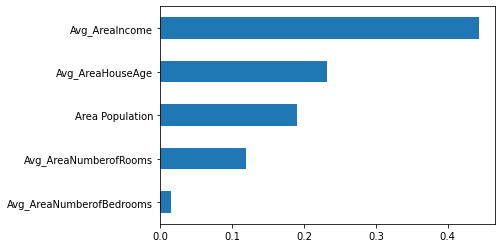

In [88]:
ser=pd.Series(random_forest.feature_importances_,index=x.columns).sort_values().plot(kind='barh')

# ada boost with hypertunning

In [89]:
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model Trainning

In [90]:
ada_boost=AdaBoostRegressor()
random={'n_estimators':np.arange(1,50),
    'learning_rate':np.linspace(0,1)
        }
rand_model=RandomizedSearchCV(ada_boost,random,cv=6)
rand_model.fit(x_train,y_train)
ans=rand_model.best_estimator_
ans

AdaBoostRegressor(learning_rate=0.8181818181818182, n_estimators=41)

## testing Evalution of adaboost with Hypertuning

In [91]:
ada_boost_hyp=ans
ada_boost_hyp.fit(x_train,y_train)

y_pred=ada_boost_hyp.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_test,y_pred)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_test=r2_score(y_test,y_pred)
print('r2_score==',r2_test)
print('*'*78)

mean_squared_error== 25840939831.264732
******************************************************************************
mean_absolute_error== 103491.3645408299
******************************************************************************
root_mean_squared_error== 160751.17365439274
******************************************************************************
r2_score== 0.7841628198559407
******************************************************************************


## training Evalution of adaboost with Hypertuning

In [92]:
y_predict=ada_boost_hyp.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print('mean_squared_error==',mse)
print('*'*78)
mae=median_absolute_error(y_train,y_predict)
print('mean_absolute_error==',mae)
print('*'*78)
rmse=np.sqrt(mse)
print('root_mean_squared_error==',rmse)
print('*'*78)
r2_train=r2_score(y_train,y_predict)
print('r2_score==',r2_train)
print('*'*78)

mean_squared_error== 22973042507.469604
******************************************************************************
mean_absolute_error== 99975.38331298088
******************************************************************************
root_mean_squared_error== 151568.6066026524
******************************************************************************
r2_score== 0.8180975413184668
******************************************************************************


## Feature importance

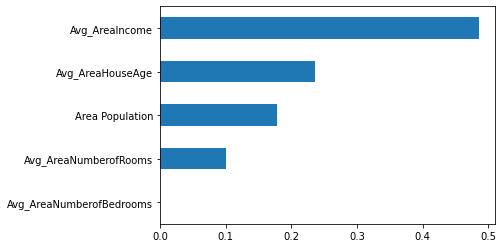

In [93]:
ser=pd.Series(ada_boost_hyp.feature_importances_,index=x.columns).sort_values().plot(kind='barh')

In [94]:
result['r2_train'].append(r2_train)
result['r2_test'].append(r2_test)
index.append('Ada boost with hyptng(rscv)')

In [95]:
Df=pd.DataFrame(result,index=index)
Df

r2_train   r2_test
Linear regression model                   0.915347  0.912789
Ridge regression with hypertunning(rscv)  0.915347  0.912790
Lasso regression with hypertunning(rscv)  0.915347  0.912789
knn model with standardiztion             0.908182  0.864364
knn model with std and hyp(gscv)          1.000000  0.873889
Knn model with normalization              0.898678  0.845306
Decision tree with hyptng(rscv)           0.876911  0.799156
Random forest with hyptng(rscv)           0.972402  0.879843
Ada boost with hyptng(rscv)               0.818098  0.784163

<AxesSubplot:>

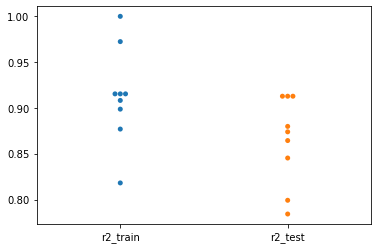

In [96]:
sns.swarmplot(data=Df)# 3 model lin reg,ridge,lasso have same accuracy 

<AxesSubplot:>

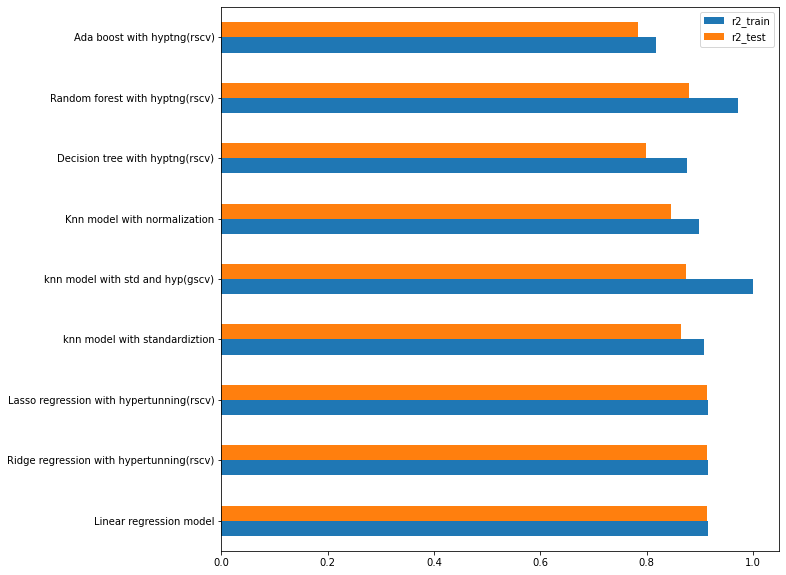

In [97]:
Df.plot(kind="barh",figsize=(10,10))

## from Above plot we conclude that we will linear regression model perform better than 
## random forest,decision tree,knn and ada boost.
## Ridge and lasso perform as same as linear regression

# Test on Single column

In [98]:
df.head(1).T

0
Avg_AreaIncome            7.954546e+04
Avg_AreaHouseAge          5.682861e+00
Avg_AreaNumberofRooms     7.009188e+00
Avg_AreaNumberofBedrooms  4.090000e+00
Area Population           2.308680e+04
Price                     1.059034e+06

In [99]:
Avg_Area_Income=eval(input('enter income==='))
Avg_Area_House_Age=eval(input('enter house age==='))
Avg_Area_Number_of_Rooms=eval(input('Number of rooms==='))
Avg_Area_Number_of_Bedrooms=eval(input('number of bedroom==='))
Area_Population=eval(input('enter population==='))

array=np.array([Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population])

enter income===10000
enter house age===5
Number of rooms===5
number of bedroom===1
enter population===19000


In [117]:
def prediction(x):
    result=lin_reg.predict([x])
    return result[0]
prediction(array)

-704887.530693264

In [121]:
with open('lin_reg.pkl','wb') as t:
    pickle.dump(lin_reg,t)

In [118]:
df.rename(columns={'Area Population':'AreaPopulation'})

Avg_AreaIncome  Avg_AreaHouseAge  Avg_AreaNumberofRooms  \
0       79545.458574          5.682861               7.009188   
1       79248.642455          6.002900               6.730821   
2       61287.067179          5.865890               8.512727   
3       63345.240046          7.188236               5.586729   
4       59982.197226          5.040555               7.839388   
...              ...               ...                    ...   
4995    60567.944140          7.830362               6.137356   
4996    78491.275435          6.999135               6.576763   
4997    63390.686886          7.250591               4.805081   
4998    68001.331235          5.534388               7.130144   
4999    65510.581804          5.992305               6.792336   

      Avg_AreaNumberofBedrooms  AreaPopulation         Price  
0                         4.09    23086.800503  1.059034e+06  
1                         3.09    40173.072174  1.505891e+06  
2                         5.13    36882.159400  1.058988e+06  
3                         3.26    34310.242831  1.260617e+06  
4                         4.23    26354.109472  6.309435e+05  
...                        ...             ...           ...  
4995                      3.46    22837.361035  1.060194e+06  
4996                      4.02    25616.115489  1.482618e+06  
4997                      2.13    33266.145490  1.030730e+06  
4998                      5.44    42625.620156  1.198657e+06  
4999                      4.07    46501.283803  1.298950e+06  

[5000 rows x 6 columns]

In [119]:
data={'columns':['Avg_AreaIncome', 'Avg_AreaHouseAge', 'Avg_AreaNumberofRooms','Avg_AreaNumberofBedrooms', 'AreaPopulation']}

In [120]:
with open ('column.json','w') as m:
    json.dump(data,m)